In [300]:
# importing libraries
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline
import IPython.display
import librosa
import librosa.display
import IPython.display as ipd
np.set_printoptions(threshold='nan')


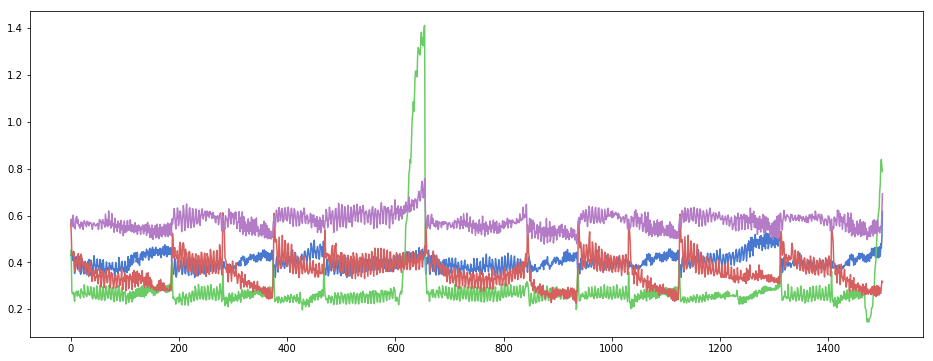

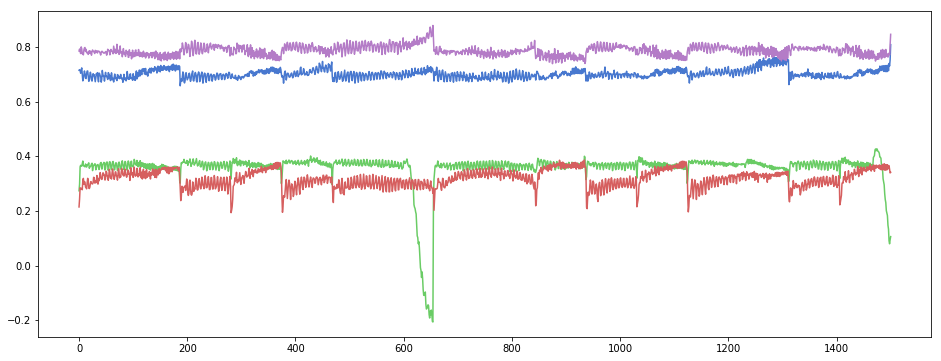

In [320]:
fs = 192000
N = 2048
H = N/4
W = np.hanning(N)#'hann'

# tracks = ['drum','beat','bass','organ', 'epiano','piano','gui_ac','gui_st','clean','str','voc_f','voc_m','voc_h']
tracks = ['piano','epiano','gui_ac','clean']
track = [[],[],[],[]]
stft = [[],[],[],[]]
mx = [[],[],[],[]]
px = [[],[],[],[]]
sc = [[],[],[],[]]


m = len(tracks) # number of tracks

for t in range(0,m):
    track[t],fs = librosa.load('../samples/phrases1/'+tracks[t]+'.wav', sr = fs, mono = 'True')
    stft[t] = librosa.stft(y = track[t], n_fft = N, win_length=N, hop_length=H, window = W)   
    mx[t], px[t] = librosa.magphase(stft[t])
    mx[t] =  mx[t] / np.sum(W) #normlaising STFT output
    sc[t] = librosa.feature.spectral_centroid(y=track[t], sr=fs, S=None, n_fft=N, hop_length=H, freq=None)
track_sum = track[0]*0.0
for t in range(0,m):
    track_sum = np.add(track_sum, track[t])

sc_track_sum = librosa.feature.spectral_centroid(y=track_sum, sr=fs, S=None, n_fft=N, hop_length=H, freq=None)    
   
    
n_hops = 1+len(track[0])/H
pan_pos = np.random.randint(2, size=(m,1, n_hops))
pan_pos[0] = np.ones((1,n_hops))*1
pan_pos[1] = np.ones((1,n_hops))*0
pan_pos[2] = np.ones((1,n_hops))*0
pan_pos[3] = np.ones((1,n_hops))*1
pw = 0.5   
pf = [[],[],[],[]]
pp = [[],[],[],[]]
for t in range(0,m):
    pf[t] = np.power(np.divide(np.log(sc[t]) , np.log( sc_track_sum  +  (10 - pw)*sc_track_sum/3 )),4)
    pp[t] = (pf[t]*((2.0*pan_pos[t])-1.0)+1.0)/2.0
    
    
plt.figure(figsize=(16,6)) 
plt.plot(np.transpose(pf[0]))
plt.plot(np.transpose(pf[1]))
plt.plot(np.transpose(pf[2]))
plt.plot(np.transpose(pf[3]))
plt.show()

plt.figure(figsize=(16,6)) 
plt.plot(np.transpose(pp[0]))
plt.plot(np.transpose(pp[1]))
plt.plot(np.transpose(pp[2]))
plt.plot(np.transpose(pp[3]))
plt.show()


In [321]:
mxL = 1j*np.copy(mx)
mxR = 1j*np.copy(mx)

yl = [[],[],[],[]]
yr = [[],[],[],[]]
y = [[[],[]],[[],[]],[[],[]],[[],[]]]

for t in range(0,m):
    mxL[t] = np.multiply ( np.cos(pp[t]*(np.pi/2.0)) , mx[t] )
    mxR[t] = np.multiply ( np.sin(pp[t]*(np.pi/2.0)) , mx[t] )
    
    mxL[t] = mxL[t] * np.exp(1j*np.angle(px[t]))
    mxR[t] = mxR[t] * np.exp(1j*np.angle(px[t]))
    
    yl[t] = librosa.istft(mxL[t], win_length=N, hop_length=H, window = W)
    yr[t] = librosa.istft(mxR[t], win_length=N, hop_length=H, window = W)
    y[t] = [yl[t], yr[t]]
   

In [325]:
ipd.Audio(track_sum, rate=fs)

In [323]:
y = np.add(np.add(np.add(y[0],y[1]),y[2]),y[3])
ipd.Audio(y, rate=fs)

In [324]:
np.shape(y)

(2, 768000)